<a href="https://colab.research.google.com/github/Tienspkt/AI_20146196_Le-Minh-Tien/blob/main/Hoa(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import keras
from keras.preprocessing.image import ImageDataGenerator

train_data=ImageDataGenerator(rescale=1./255, shear_range=0.2, zoom_range=0.2, horizontal_flip=True)
test_data= ImageDataGenerator(rescale = 1./255)

training_set=train_data.flow_from_directory('/content/drive/MyDrive/HoaVN/dulieu5loaihoa/train',target_size=(150,150), batch_size=32, class_mode='categorical')
test_set=test_data.flow_from_directory('/content/drive/MyDrive/HoaVN/dulieu5loaihoa/valatition',target_size=(150,150 ), batch_size=32, class_mode='categorical')
     


training_set.class_indices
test_set.class_indices

Found 3086 images belonging to 5 classes.
Found 114 images belonging to 5 classes.


{'common_daisy': 0, 'lotus': 1, 'pink': 2, 'rose': 3, 'water_lily': 4}

In [8]:
#tạo mô hình CNN sủ dụng tuần tự
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout,Flatten,Conv2D, MaxPooling2D, Normalization         #dense :full conected ANN
from keras.layers import LeakyReLU
from keras.optimizers import Adam
model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(150,150,3),padding = 'same'))                                                          #32 lần tích chập đầu tiên
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))




#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(256,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(5,activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 150, 150, 32)      896       
                                                                 
 leaky_re_lu_10 (LeakyReLU)  (None, 150, 150, 32)      0         
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 75, 75, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 75, 75, 64)        18496     
                                                                 
 leaky_re_lu_11 (LeakyReLU)  (None, 75, 75, 64)        0         
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 38, 38, 64)       0         
 2D)                                                  

In [9]:
# Biên dịch 
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(training_set, epochs= 7 , batch_size= 512 ,verbose= 1)
test_loss,test_acc = model.evaluate(training_set)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/7
97/97 [==============================] - 268s 3s/step - loss: 1.0148 - accuracy: 0.6027
Epoch 2/7
97/97 [==============================] - 257s 3s/step - loss: 0.7891 - accuracy: 0.7080
Epoch 3/7
97/97 [==============================] - 268s 3s/step - loss: 0.6769 - accuracy: 0.7641
Epoch 4/7
97/97 [==============================] - 263s 3s/step - loss: 0.5611 - accuracy: 0.8052
Epoch 5/7
97/97 [==============================] - 257s 3s/step - loss: 0.4552 - accuracy: 0.8396
Epoch 6/7
97/97 [==============================] - 257s 3s/step - loss: 0.4063 - accuracy: 0.8493
Epoch 7/7
97/97 [==============================] - 97s 993ms/step - loss: 0.3203 - accuracy: 0.8830
độ chính xác trên tập kiểm tra 0.8830201029777527
hàm mất mát trên tập kiểm ta 0.3202660083770752


In [10]:
#Lưu
from keras.models import load_model
model.save("Hoa(CNN).h5")
model_1=load_model('Hoa(CNN).h5')

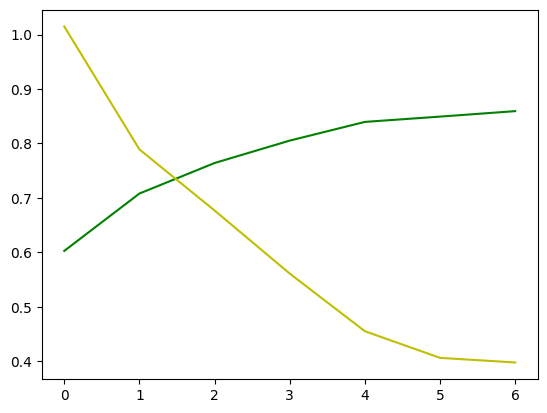

In [11]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']    # VẼ ĐỒ THỊ SỬ MẤT MÁT VÀ ĐỘ HỌC TẬP CHÍNH XÁC CỦA BÀI KIỂM TRA
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'g',label = 'Training accuracy')
plt.plot(epochs,loss,'y',label = 'Training loss')
plt.show()

1/1 [==============================] - 0s 138ms/step
common_dasiy


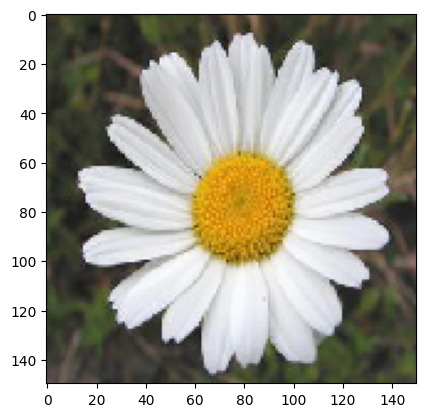

1/1 [==============================] - 0s 41ms/step
common_dasiy


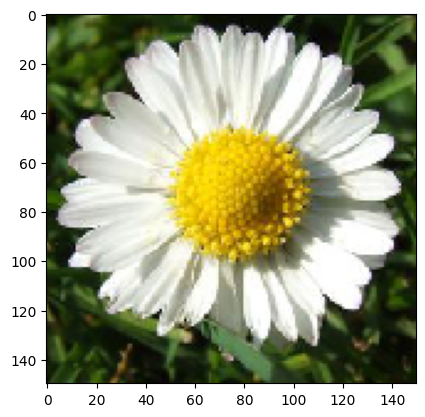

1/1 [==============================] - 0s 47ms/step
common_dasiy


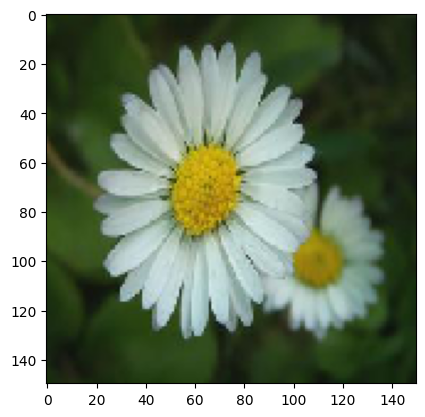

1/1 [==============================] - 0s 47ms/step
common_dasiy


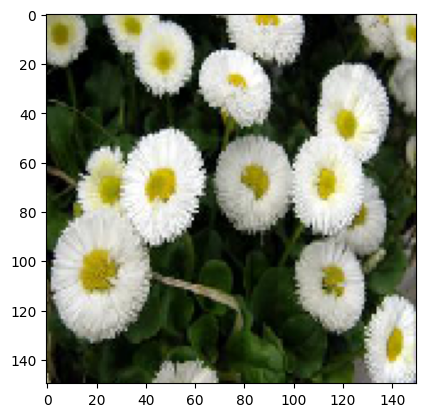

1/1 [==============================] - 0s 75ms/step
common_dasiy


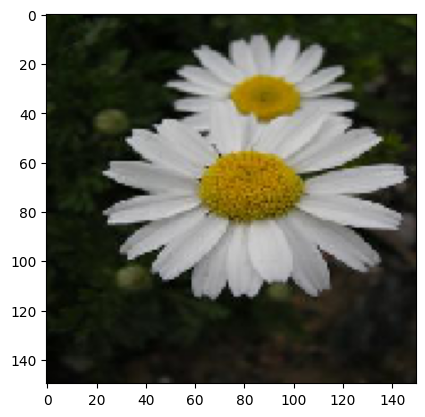

1/1 [==============================] - 0s 51ms/step
common_dasiy


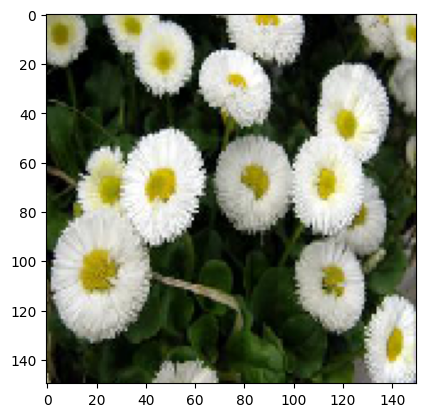

1/1 [==============================] - 0s 49ms/step
common_dasiy


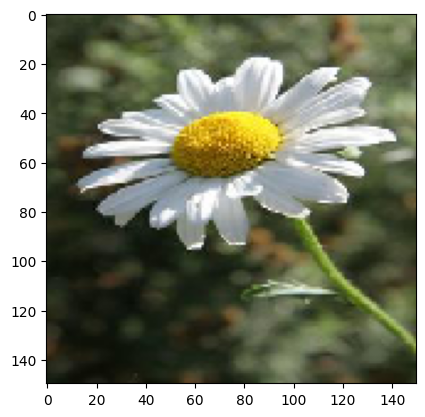

1/1 [==============================] - 0s 45ms/step
common_dasiy


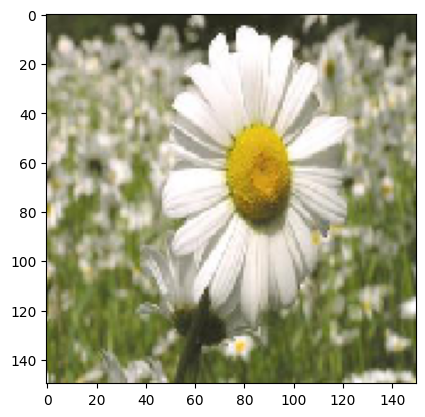

1/1 [==============================] - 0s 45ms/step
water_lity


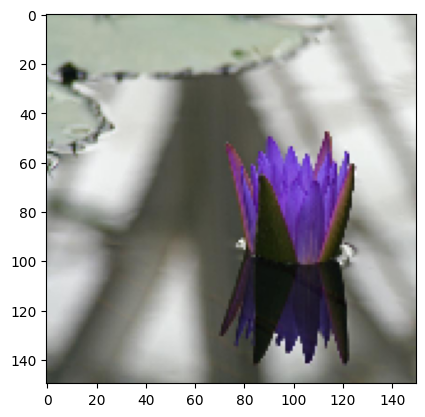

1/1 [==============================] - 0s 46ms/step
water_lity


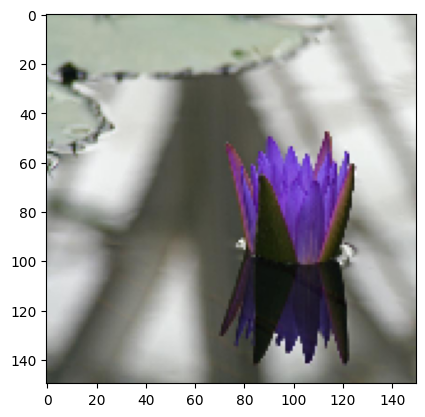

1/1 [==============================] - 0s 47ms/step
water_lity


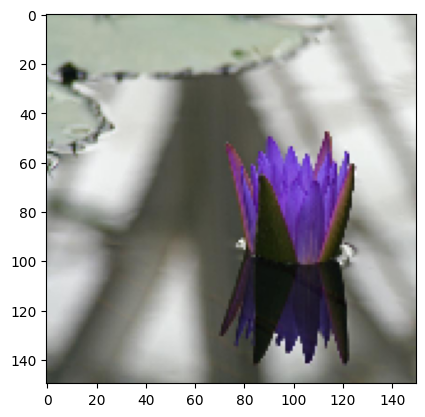

1/1 [==============================] - 0s 46ms/step
water_lity


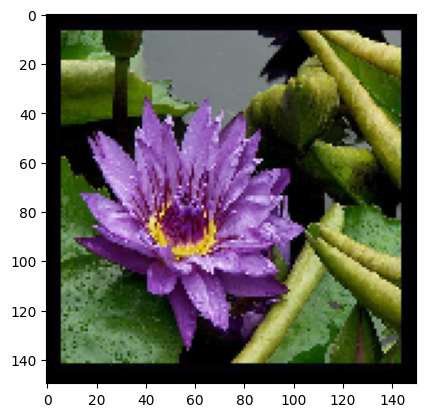

1/1 [==============================] - 0s 43ms/step
water_lity


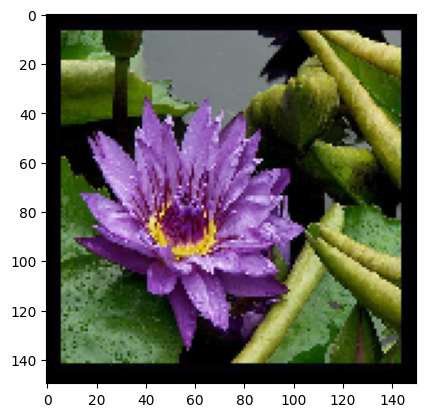

1/1 [==============================] - 0s 43ms/step
water_lity


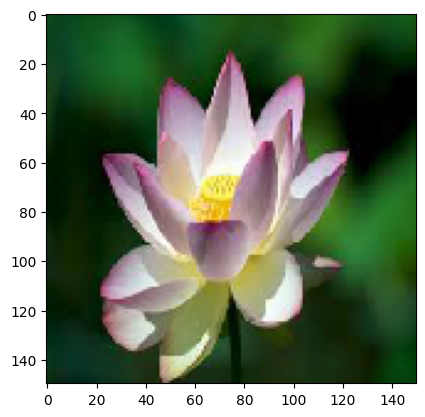

1/1 [==============================] - 0s 41ms/step
water_lity


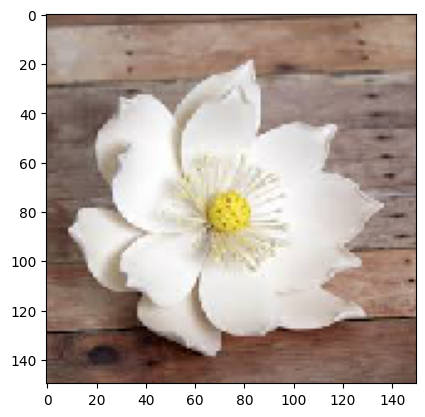

1/1 [==============================] - 0s 50ms/step
lotus


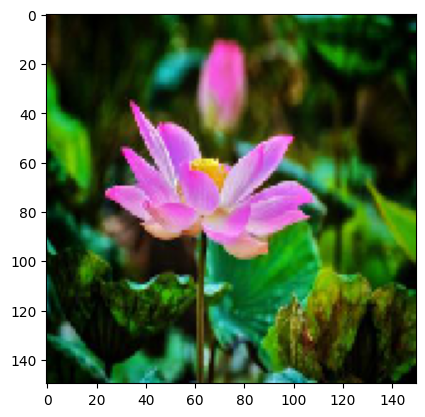

1/1 [==============================] - 0s 55ms/step
common_dasiy


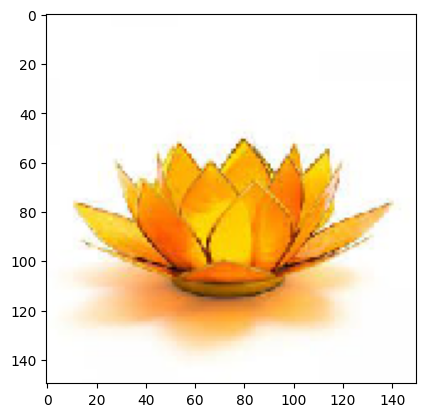

1/1 [==============================] - 0s 45ms/step
water_lity


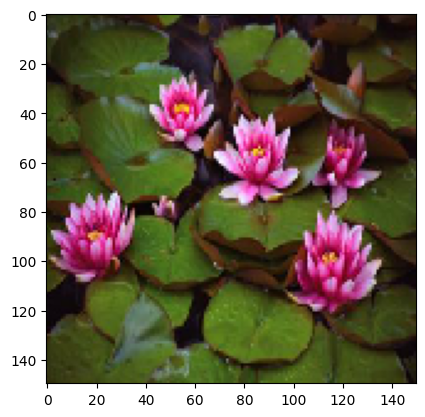

1/1 [==============================] - 0s 42ms/step
water_lity


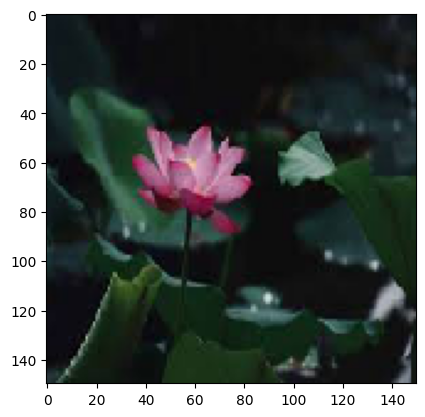

1/1 [==============================] - 0s 80ms/step
lotus


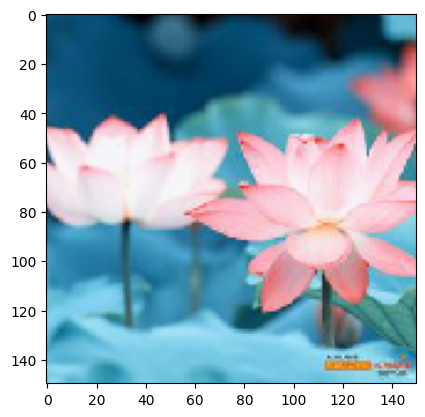

1/1 [==============================] - 0s 83ms/step
water_lity


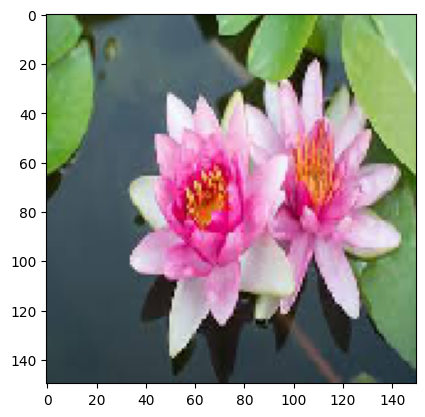

1/1 [==============================] - 0s 87ms/step
pink


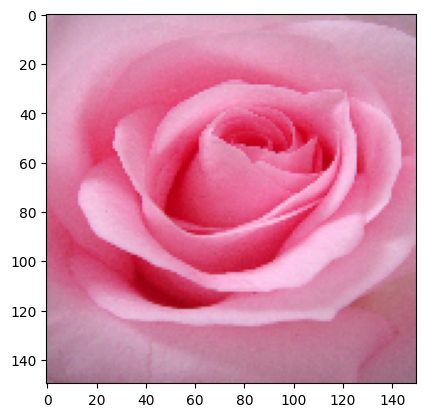

1/1 [==============================] - 0s 67ms/step
pink


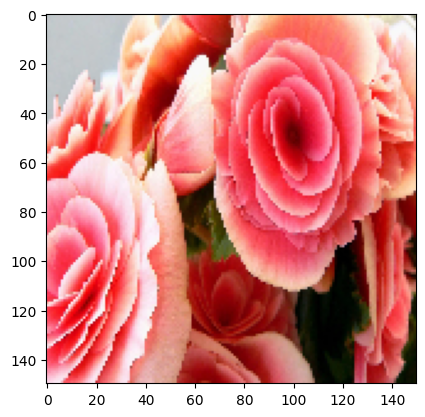

1/1 [==============================] - 0s 67ms/step
rose


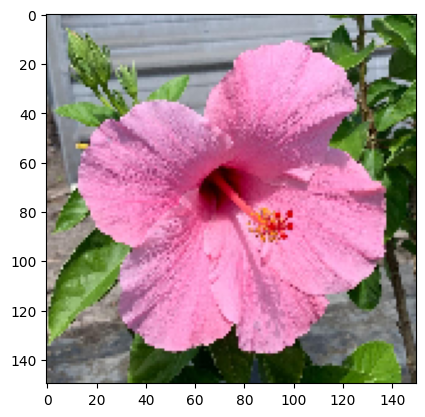

1/1 [==============================] - 0s 68ms/step
pink


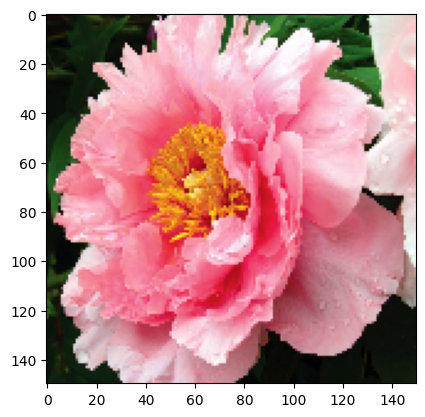

1/1 [==============================] - 0s 42ms/step
pink


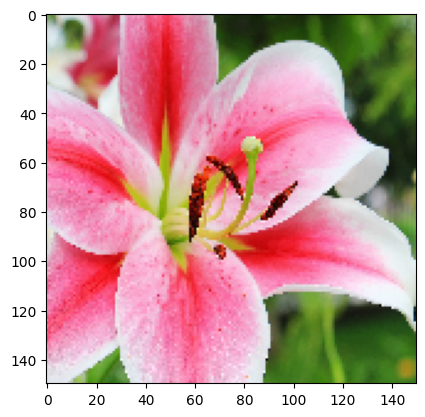

1/1 [==============================] - 0s 46ms/step
pink


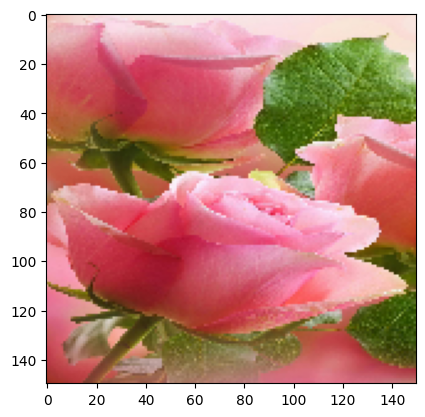

1/1 [==============================] - 0s 42ms/step
pink


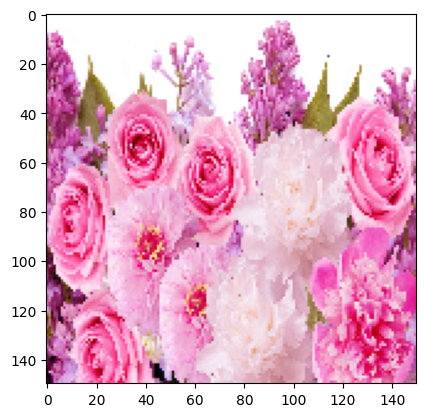

1/1 [==============================] - 0s 41ms/step
pink


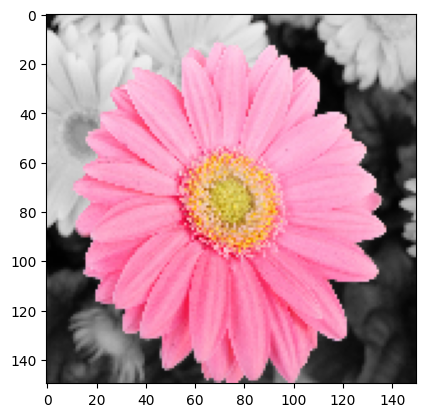

1/1 [==============================] - 0s 47ms/step
pink


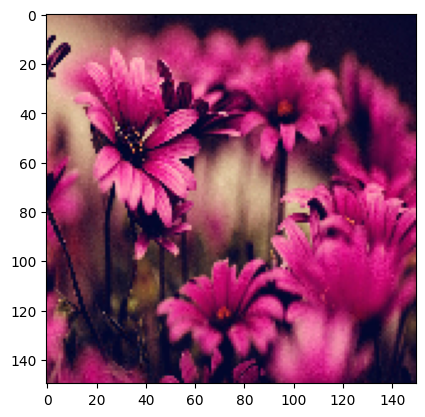

1/1 [==============================] - 0s 55ms/step
water_lity


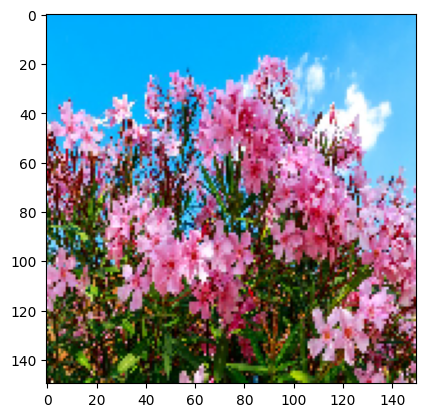

1/1 [==============================] - 0s 44ms/step
pink


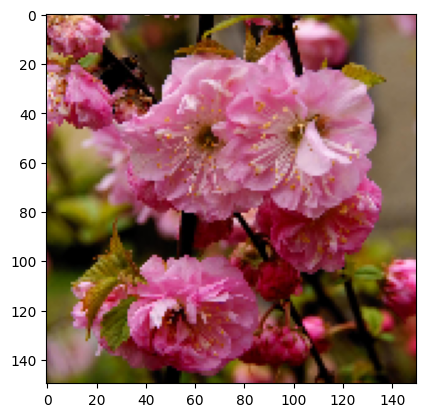

1/1 [==============================] - 0s 44ms/step
pink


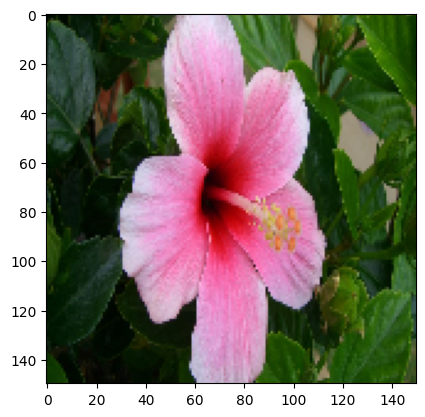

In [17]:
from keras.models import load_model
from keras.utils import load_img, img_to_array
import os
import numpy as np 
test='/content/drive/MyDrive/HoaVN/dulieu5loaihoa/test'

for i in os.listdir(test):
  img=load_img(test+'/'+i,target_size=(150,150))
  plt.imshow(img)
  img=img_to_array(img) 
  img=img.astype('float32') 
  img=img/255 
  img=np.expand_dims(img,axis=0)
  result=(model_1.predict(img).argmax()) 
  class_name=['common_dasiy','lotus','pink','rose','water_lity']
  print(class_name[result]) 
  plt.show()